In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA


1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

2. Подберите параметры модели SARIMAX для этого ряда.

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

4. Возмите вариант 1 или 2 
    - Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
    - Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19  (по любой стране кроме Китая на дневных графиках )


5. Оцените результат моделирования

6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [2]:
data = pd.read_csv("my_PJME_MW.csv", index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data_m = data[["PJME_MW", "year", "month", "quarter"]].resample("M").mean().sort_index()
data_m.head(5)

,PJME_MW,year,month,quarter
Date,,,,
2002-01-31,31075.399731,2002,1,1
2002-02-28,30239.166667,2002,2,1
2002-03-31,28875.256720,2002,3,1
2002-04-30,28534.731572,2002,4,2
2002-05-31,28073.653226,2002,5,2


In [4]:
data_m['PJME_MW'].shape

(200,)

2. Подберите параметры модели SARIMAX для этого ряда.

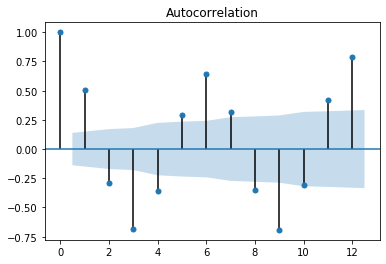

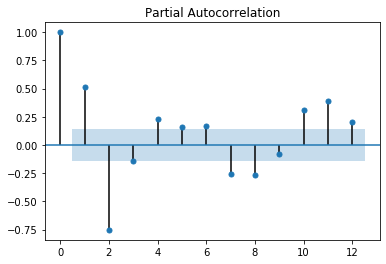

In [5]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=12)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=12)
plt.show()

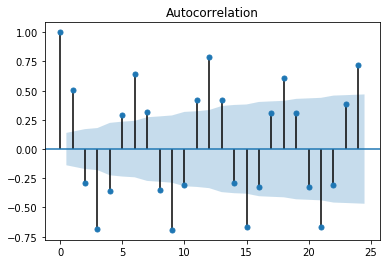

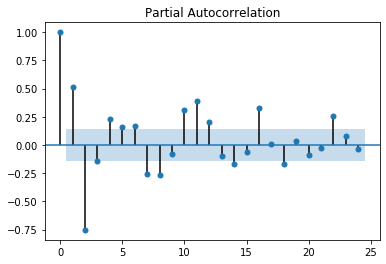

In [6]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=24)
plt.show()

In [7]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

ps = [1] 
ds = [0,1]
qs = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(ps, ds, qs))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (1, 0, 1, 12)
SARIMAX: (0, 0, 1) x (1, 0, 0, 12)
SARIMAX: (0, 0, 2) x (1, 0, 0, 12)
SARIMAX: (0, 0, 2) x (1, 0, 1, 12)


In [8]:
import warnings

min_aic = None
param_optimal = None
param_seasonal_optimal = None

warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values,
                                            order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
            if not min_aic or min_aic > results.aic:
                min_aic = results.aic
                param_optimal = param
                param_seasonal_optimal = param_seasonal                
        except:
            continue
            
            
print('*' * 50)
print('ARIMA {} x {} 3 - AIC:{}'.format(param_optimal, param_seasonal_optimal, min_aic))

ARIMA(0, 0, 0)x(1, 0, 0, 12)3 - AIC:3395.4729852030323
ARIMA(0, 0, 0)x(1, 0, 1, 12)3 - AIC:3374.748426772136
ARIMA(0, 0, 0)x(1, 0, 2, 12)3 - AIC:3120.5216495293516
ARIMA(0, 0, 0)x(1, 1, 0, 12)3 - AIC:3150.4921894031295
ARIMA(0, 0, 0)x(1, 1, 1, 12)3 - AIC:3133.2572647453185
ARIMA(0, 0, 0)x(1, 1, 2, 12)3 - AIC:2898.867195399489
ARIMA(0, 0, 1)x(1, 0, 0, 12)3 - AIC:4252.256233105178


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)3 - AIC:3325.720874949164


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 2, 12)3 - AIC:3430.2352063791413
ARIMA(0, 0, 1)x(1, 1, 0, 12)3 - AIC:3126.359976846858
ARIMA(0, 0, 1)x(1, 1, 1, 12)3 - AIC:3092.841079599963
ARIMA(0, 0, 1)x(1, 1, 2, 12)3 - AIC:2869.960486061297


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 0, 0, 12)3 - AIC:3387.99961797978
ARIMA(0, 0, 2)x(1, 0, 1, 12)3 - AIC:4192.011994046619
ARIMA(0, 0, 2)x(1, 0, 2, 12)3 - AIC:3922.664277858389
ARIMA(0, 0, 2)x(1, 1, 0, 12)3 - AIC:3128.833410736437
ARIMA(0, 0, 2)x(1, 1, 1, 12)3 - AIC:3078.127471455029
ARIMA(0, 0, 2)x(1, 1, 2, 12)3 - AIC:2844.0510009801073
ARIMA(0, 1, 0)x(1, 0, 0, 12)3 - AIC:3400.8181137173547
ARIMA(0, 1, 0)x(1, 0, 1, 12)3 - AIC:3348.940189327792
ARIMA(0, 1, 0)x(1, 0, 2, 12)3 - AIC:3125.767029720866
ARIMA(0, 1, 0)x(1, 1, 0, 12)3 - AIC:3167.3838452348764
ARIMA(0, 1, 0)x(1, 1, 1, 12)3 - AIC:3133.468884020476
ARIMA(0, 1, 0)x(1, 1, 2, 12)3 - AIC:2903.564063424823
ARIMA(0, 1, 1)x(1, 0, 0, 12)3 - AIC:3383.3790806440156
ARIMA(0, 1, 1)x(1, 0, 1, 12)3 - AIC:3297.5573450515367
ARIMA(0, 1, 1)x(1, 0, 2, 12)3 - AIC:3068.8488254273257
ARIMA(0, 1, 1)x(1, 1, 0, 12)3 - AIC:3144.3148107104394
ARIMA(0, 1, 1)x(1, 1, 1, 12)3 - AIC:3072.4819388121678
ARIMA(0, 1, 1)x(1, 1, 2, 12)3 - AIC:2848.5139073074474
ARIMA(0, 1, 2)x(1, 0

c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(1, 0, 2, 12)3 - AIC:3099.3407520023557
ARIMA(0, 2, 2)x(1, 1, 0, 12)3 - AIC:3167.786830182322
ARIMA(0, 2, 2)x(1, 1, 1, 12)3 - AIC:3088.918301651396


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(1, 1, 2, 12)3 - AIC:2832.0385686807613
ARIMA(1, 0, 0)x(1, 0, 0, 12)3 - AIC:3451.4602983710683
ARIMA(1, 0, 0)x(1, 0, 1, 12)3 - AIC:3343.7017955488664
ARIMA(1, 0, 0)x(1, 0, 2, 12)3 - AIC:3093.0172055953026
ARIMA(1, 0, 0)x(1, 1, 0, 12)3 - AIC:3105.6696272757813
ARIMA(1, 0, 0)x(1, 1, 1, 12)3 - AIC:3108.9483173160083
ARIMA(1, 0, 0)x(1, 1, 2, 12)3 - AIC:2869.017658398462


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)3 - AIC:3353.072528614626
ARIMA(1, 0, 1)x(1, 0, 1, 12)3 - AIC:3398.2901701706533


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 2, 12)3 - AIC:3081.432831338642
ARIMA(1, 0, 1)x(1, 1, 0, 12)3 - AIC:3110.4970867049815


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)3 - AIC:3090.8671939517835
ARIMA(1, 0, 1)x(1, 1, 2, 12)3 - AIC:2866.9243387791967
ARIMA(1, 0, 2)x(1, 0, 0, 12)3 - AIC:3441.0629947217803
ARIMA(1, 0, 2)x(1, 0, 1, 12)3 - AIC:3399.3738434303095


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 0, 2, 12)3 - AIC:3076.1660446315045
ARIMA(1, 0, 2)x(1, 1, 0, 12)3 - AIC:3107.762648491289
ARIMA(1, 0, 2)x(1, 1, 1, 12)3 - AIC:3063.696367673683


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 1, 2, 12)3 - AIC:2837.4726504365844
ARIMA(1, 1, 0)x(1, 0, 0, 12)3 - AIC:3374.5175644426495
ARIMA(1, 1, 0)x(1, 0, 1, 12)3 - AIC:3337.5576736178846
ARIMA(1, 1, 0)x(1, 0, 2, 12)3 - AIC:3110.008554422263
ARIMA(1, 1, 0)x(1, 1, 0, 12)3 - AIC:3139.003056983158
ARIMA(1, 1, 0)x(1, 1, 1, 12)3 - AIC:3118.9521931060654
ARIMA(1, 1, 0)x(1, 1, 2, 12)3 - AIC:2882.518154144377
ARIMA(1, 1, 1)x(1, 0, 0, 12)3 - AIC:3332.0061085493076


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)3 - AIC:3270.0727149205045


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 2, 12)3 - AIC:3054.9465845656764
ARIMA(1, 1, 1)x(1, 1, 0, 12)3 - AIC:3114.311540789776
ARIMA(1, 1, 1)x(1, 1, 1, 12)3 - AIC:3059.0337205250107


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 2, 12)3 - AIC:2834.183271936225
ARIMA(1, 1, 2)x(1, 0, 0, 12)3 - AIC:3397.990252197833


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 0, 1, 12)3 - AIC:3252.699195824596


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 0, 2, 12)3 - AIC:3058.391838816583
ARIMA(1, 1, 2)x(1, 1, 0, 12)3 - AIC:3114.2730572579276
ARIMA(1, 1, 2)x(1, 1, 1, 12)3 - AIC:3061.328427419833


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 1, 2, 12)3 - AIC:2821.136364137119
ARIMA(1, 2, 0)x(1, 0, 0, 12)3 - AIC:3480.6581137081675
ARIMA(1, 2, 0)x(1, 0, 1, 12)3 - AIC:3497.294081763127
ARIMA(1, 2, 0)x(1, 0, 2, 12)3 - AIC:3213.474706348644
ARIMA(1, 2, 0)x(1, 1, 0, 12)3 - AIC:3246.5676925639173
ARIMA(1, 2, 0)x(1, 1, 1, 12)3 - AIC:3218.3367599917055
ARIMA(1, 2, 0)x(1, 1, 2, 12)3 - AIC:3002.384195344406
ARIMA(1, 2, 1)x(1, 0, 0, 12)3 - AIC:3389.950441816186
ARIMA(1, 2, 1)x(1, 0, 1, 12)3 - AIC:3349.0318658058395
ARIMA(1, 2, 1)x(1, 0, 2, 12)3 - AIC:3083.91300687123
ARIMA(1, 2, 1)x(1, 1, 0, 12)3 - AIC:3155.736323227052
ARIMA(1, 2, 1)x(1, 1, 1, 12)3 - AIC:3104.2563658273675
ARIMA(1, 2, 1)x(1, 1, 2, 12)3 - AIC:2867.736398648741
ARIMA(1, 2, 2)x(1, 0, 0, 12)3 - AIC:3375.5739394573066
ARIMA(1, 2, 2)x(1, 0, 1, 12)3 - AIC:3328.4044994511514
ARIMA(1, 2, 2)x(1, 0, 2, 12)3 - AIC:3103.5636489746453


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 1, 0, 12)3 - AIC:3123.7664769360035
ARIMA(1, 2, 2)x(1, 1, 1, 12)3 - AIC:3081.027427915883


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 1, 2, 12)3 - AIC:2868.9491330800765
ARIMA(2, 0, 0)x(1, 0, 0, 12)3 - AIC:3420.1089573291392
ARIMA(2, 0, 0)x(1, 0, 1, 12)3 - AIC:3419.0266133154805


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(1, 0, 2, 12)3 - AIC:3095.2661886262845
ARIMA(2, 0, 0)x(1, 1, 0, 12)3 - AIC:3090.9404704355106
ARIMA(2, 0, 0)x(1, 1, 1, 12)3 - AIC:3093.792199290905
ARIMA(2, 0, 0)x(1, 1, 2, 12)3 - AIC:2870.882228461345


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 0, 12)3 - AIC:3362.8514709998594
ARIMA(2, 0, 1)x(1, 0, 1, 12)3 - AIC:3367.947898808236


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 2, 12)3 - AIC:3144.0947990047152
ARIMA(2, 0, 1)x(1, 1, 0, 12)3 - AIC:3093.405783923371
ARIMA(2, 0, 1)x(1, 1, 1, 12)3 - AIC:3094.121140329107


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 1, 2, 12)3 - AIC:2866.803823107857
ARIMA(2, 0, 2)x(1, 0, 0, 12)3 - AIC:3389.0220985197957


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 1, 12)3 - AIC:3366.2445707347997


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 2, 12)3 - AIC:3142.875495411812
ARIMA(2, 0, 2)x(1, 1, 0, 12)3 - AIC:3091.6161633367656
ARIMA(2, 0, 2)x(1, 1, 1, 12)3 - AIC:3072.1583068437767


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 1, 2, 12)3 - AIC:2839.6033476544762
ARIMA(2, 1, 0)x(1, 0, 0, 12)3 - AIC:3332.8011559634947
ARIMA(2, 1, 0)x(1, 0, 1, 12)3 - AIC:3296.17125645304
ARIMA(2, 1, 0)x(1, 0, 2, 12)3 - AIC:3091.939630274378
ARIMA(2, 1, 0)x(1, 1, 0, 12)3 - AIC:3098.523227310534
ARIMA(2, 1, 0)x(1, 1, 1, 12)3 - AIC:3079.981265133866
ARIMA(2, 1, 0)x(1, 1, 2, 12)3 - AIC:2867.9269209812173
ARIMA(2, 1, 1)x(1, 0, 0, 12)3 - AIC:3325.491532586523
ARIMA(2, 1, 1)x(1, 0, 1, 12)3 - AIC:3305.0162376544413
ARIMA(2, 1, 1)x(1, 0, 2, 12)3 - AIC:3056.6684641195593
ARIMA(2, 1, 1)x(1, 1, 0, 12)3 - AIC:3099.904520449715
ARIMA(2, 1, 1)x(1, 1, 1, 12)3 - AIC:3075.7839591170127


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 1, 2, 12)3 - AIC:2836.096115514986
ARIMA(2, 1, 2)x(1, 0, 0, 12)3 - AIC:3313.6463985748883
ARIMA(2, 1, 2)x(1, 0, 1, 12)3 - AIC:3254.157277584965


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 0, 2, 12)3 - AIC:3052.8926293269924
ARIMA(2, 1, 2)x(1, 1, 0, 12)3 - AIC:3100.1892139286547


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 1, 12)3 - AIC:3060.174126076311


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 2, 12)3 - AIC:2830.299280396593
ARIMA(2, 2, 0)x(1, 0, 0, 12)3 - AIC:3407.991314108571
ARIMA(2, 2, 0)x(1, 0, 1, 12)3 - AIC:3370.429353380593
ARIMA(2, 2, 0)x(1, 0, 2, 12)3 - AIC:3163.348977387086
ARIMA(2, 2, 0)x(1, 1, 0, 12)3 - AIC:3167.2641019107728
ARIMA(2, 2, 0)x(1, 1, 1, 12)3 - AIC:3146.869632099135
ARIMA(2, 2, 0)x(1, 1, 2, 12)3 - AIC:2936.30570983929
ARIMA(2, 2, 1)x(1, 0, 0, 12)3 - AIC:3354.7537948036925
ARIMA(2, 2, 1)x(1, 0, 1, 12)3 - AIC:3391.760204062184


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(1, 0, 2, 12)3 - AIC:3065.4017482176087
ARIMA(2, 2, 1)x(1, 1, 0, 12)3 - AIC:3105.769169960422
ARIMA(2, 2, 1)x(1, 1, 1, 12)3 - AIC:3083.0050525744937
ARIMA(2, 2, 1)x(1, 1, 2, 12)3 - AIC:2881.396953430719
ARIMA(2, 2, 2)x(1, 0, 0, 12)3 - AIC:3347.0160465691706
ARIMA(2, 2, 2)x(1, 0, 1, 12)3 - AIC:3319.7777724934076


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 0, 2, 12)3 - AIC:3095.14340638755
ARIMA(2, 2, 2)x(1, 1, 0, 12)3 - AIC:3121.6356844156962
ARIMA(2, 2, 2)x(1, 1, 1, 12)3 - AIC:3067.9856589416668


c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 1, 2, 12)3 - AIC:2857.172401092563
**************************************************
ARIMA (0, 1, 2) x (1, 1, 2, 12) 3 - AIC:2818.395758422374


3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

In [9]:
mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],
                                    order=param_optimal,
                                    seasonal_order=param_seasonal_optimal,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

In [10]:
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 2606.3201809786383


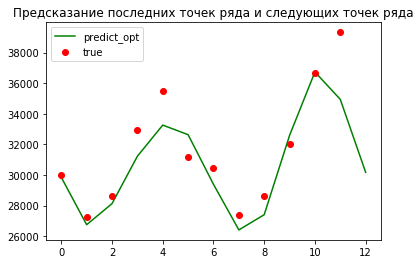

In [11]:
plt.plot(results_opt.forecast(13), "g", label="predict_opt")
plt.plot(data_m["PJME_MW"].values[-12:], "or", label="true")
plt.title("Предсказание последних точек ряда и следующих точек ряда")
plt.legend()

plt.show()

Недельный аик 7316, месячный 2606. Получается месячная модель лучше недельной.

4. Возмите вариант 1 или 2 
    - Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)

In [18]:
brent_data = pd.read_csv('my_BRENT2019.csv', sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [23]:
brent_data_w = brent_data[["Значение"]].resample('W').mean().sort_index()
brent_data_w.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


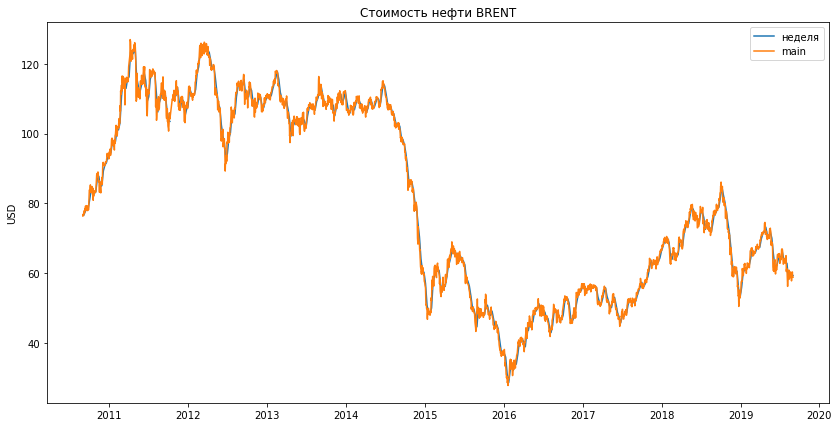

In [24]:
plt.figure(figsize=(14, 7))

plt.plot(brent_data_w.index, brent_data_w["Значение"], '-', label='неделя')
plt.plot(brent_data.index, brent_data["Значение"], '-', label='main')
plt.legend()

plt.title('Стоимость нефти BRENT')
plt.ylabel('USD')


plt.show()

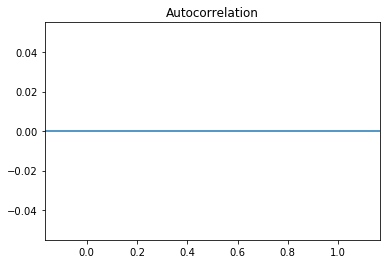

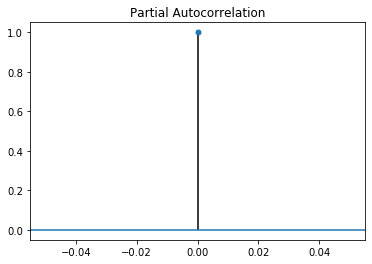

In [28]:
sm.graphics.tsa.plot_acf(brent_data_w['Значение'].values, lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(brent_data_w['Значение'].values, lags=24)
plt.show()

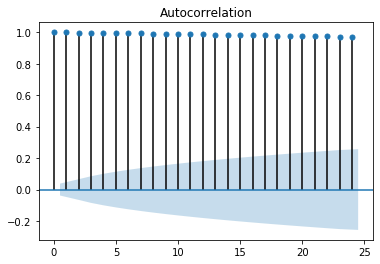

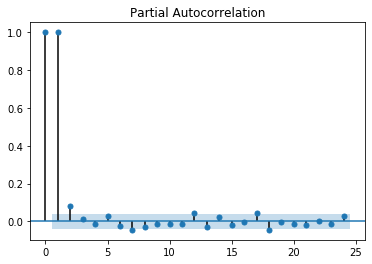

In [26]:
sm.graphics.tsa.plot_acf(brent_data['Значение'].values, lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(brent_data['Значение'].values, lags=24)
plt.show()

In [29]:
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

In [37]:
import warnings

min_aic = None
param_optimal = None
param_seasonal= [0, 0, 0, 0]

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(brent_data_w['Значение'].values,
                                order=param,
                                seasonal_order=param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

        results = mod.fit()
        print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        if not min_aic or min_aic > results.aic:
            min_aic = results.aic
            param_optimal = param              
    except:
        continue
        
print('*' * 50)
print('ARIMA {} x {} 3 - AIC:{}'.format(param_optimal, param_seasonal, min_aic))

ARIMA(0, 0, 0)x[0, 0, 0, 0]3 - AIC:5488.563364748504
ARIMA(0, 0, 1)x[0, 0, 0, 0]3 - AIC:4848.983257279206
ARIMA(0, 0, 2)x[0, 0, 0, 0]3 - AIC:4280.939076904093
ARIMA(0, 1, 0)x[0, 0, 0, 0]3 - AIC:2084.993293803819
ARIMA(0, 1, 1)x[0, 0, 0, 0]3 - AIC:2024.0058968421422
ARIMA(0, 1, 2)x[0, 0, 0, 0]3 - AIC:2022.3981917504498
ARIMA(0, 2, 0)x[0, 0, 0, 0]3 - AIC:2215.8998924339066
ARIMA(0, 2, 1)x[0, 0, 0, 0]3 - AIC:2079.357454778403
ARIMA(0, 2, 2)x[0, 0, 0, 0]3 - AIC:2022.7974990707926
ARIMA(1, 0, 0)x[0, 0, 0, 0]3 - AIC:2090.3481888328515
ARIMA(1, 0, 1)x[0, 0, 0, 0]3 - AIC:2029.3129324740744
ARIMA(1, 0, 2)x[0, 0, 0, 0]3 - AIC:2027.4755492040806
ARIMA(1, 1, 0)x[0, 0, 0, 0]3 - AIC:2031.9122457400244
ARIMA(1, 1, 1)x[0, 0, 0, 0]3 - AIC:2025.8734776115537
ARIMA(1, 1, 2)x[0, 0, 0, 0]3 - AIC:2022.092682970546
ARIMA(1, 2, 0)x[0, 0, 0, 0]3 - AIC:2181.245565902427
ARIMA(1, 2, 1)x[0, 0, 0, 0]3 - AIC:2032.4524119110074
ARIMA(1, 2, 2)x[0, 0, 0, 0]3 - AIC:2024.7683693284687
ARIMA(2, 0, 0)x[0, 0, 0, 0]3 - AIC:

In [44]:
mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-30],
                                    order=param_optimal,
                                    seasonal_order=[0, 0, 0, 0],
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:',results_opt.aic)

AIC: 3095.390125046647


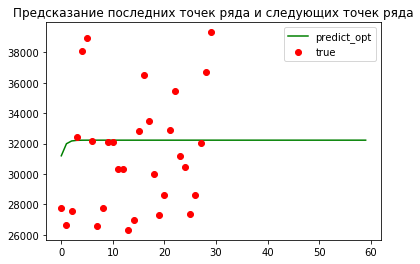

In [50]:
plt.plot(results_opt.forecast(60), "g", label="predict_opt")
plt.plot(data_m["PJME_MW"].values[-30:], "or", label="true")


plt.title("Предсказание последних точек ряда и следующих точек ряда")
plt.legend()

plt.show()

In [46]:
print(results_opt.summary().tables[0],results_opt.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  170
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1543.695
Date:                Mon, 03 Aug 2020   AIC                           3095.390
Time:                        17:20:41   BIC                           3107.838
Sample:                             0   HQIC                          3100.443
                                - 170                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2275      0.096      2.375      0.0

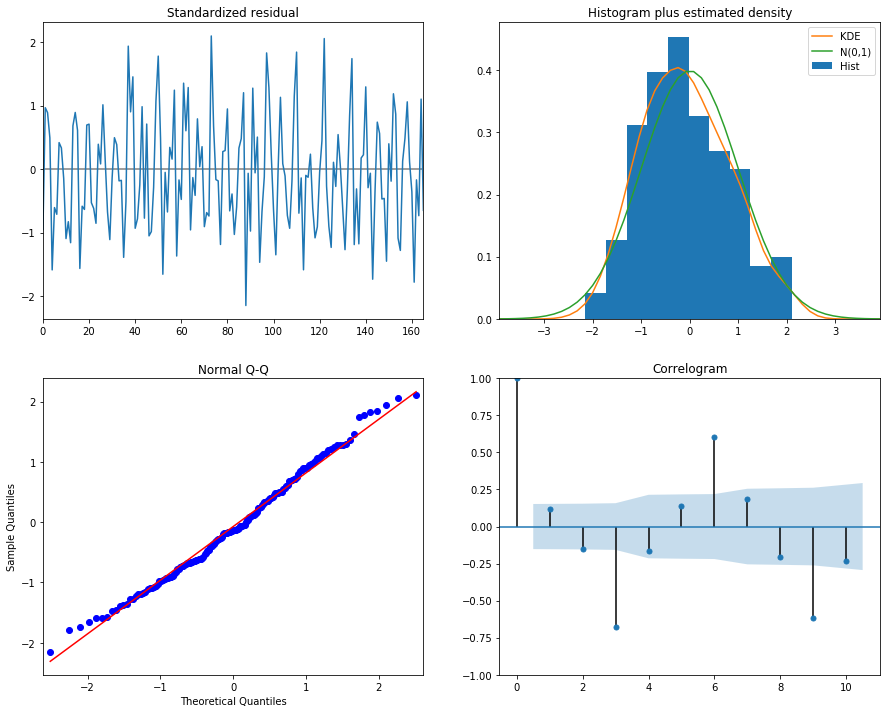

In [47]:
results_opt.plot_diagnostics(figsize=(15, 12))
plt.show()

5. Оцените результат моделирования

ARIMA предсказала направление движения, но не предсказала скачки цены. 

In [51]:
6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.

SyntaxError: invalid syntax (<ipython-input-51-222835254c2b>, line 1)

ARIMA лучше работает с рядами, где есть сезон